# <span style="color:darkblue"> QTM 151 - Quiz 3 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your Emory ID as a string below

In [13]:
# Write your answer here
print("2517419")

<font size = "5" >
This quiz is open book 

- You can use the lecture notes and the internet
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


**By printing the message, you acknowledge that you will abide by Emory's code of conduct.**

In [14]:
# Write your answer here:
print("I will abide by Emory's code of conduct")

<font size = "5">

Import the libraries "numpy" and "pandas"

In [1]:
# Write your answer here
import numpy as np
import pandas as pd


<font size = "5">

(a) Replace the values of a column

<font size = "3">

- Import the "data_raw/sprint_results.csv" file
- Print the list with the unique values that are not numeric in the column "positionText"
- Replace the non-numerica values ("R" and "N") with ```np.nan``` (missing value) in the column "positionText"
- Create a new column "positionNumeric" that converts the modified "positionText" column from string to numeric using ```pd.to_numeric()```

HINT: See the example in Lecture 12

In [9]:
# Write your own code
sprint_results = pd.read_csv("data_raw/sprint_results.csv")
subset = sprint_results.query("positionText.str.isnumeric()==False")
list_unique = pd.unique(subset["positionText"])
print(list_unique)

list_replaced = [np.nan, np.nan]
sprint_results["positionText"] = sprint_results["positionText"].replace(list_unique, list_replaced)
sprint_results["positionNumeric"] = pd.to_numeric(sprint_results["positionText"])
print(sprint_results.dtypes)

['R' 'N']
resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number               int64
grid                 int64
position            object
positionText        object
positionOrder        int64
points               int64
laps                 int64
time                object
milliseconds        object
fastestLap          object
fastestLapTime      object
statusId             int64
positionNumeric    float64
dtype: object


<font size = "5">

(b) Recode a numeric colum

<font size = "3">

- Import the "data_raw/races.csv" file
- Recode the "year" column into a new column "year_brackets" with the following categories

$\qquad$ ``` ["1950-1974","1975-1999","2000-onwards"] ```

- Display the new "year_brackets" variable

$\qquad$ HINT: Use the "pd.cut()" command. See Lecture 12 (check the note in the example!)

In [11]:
# Write your own code
races = pd.read_csv("data_raw/races.csv")
bins_x = [1949,1974,1999,np.inf]
labels_x = ["1950-1974", "1975-1999", "2000-onwards"]
races["year"] = pd.cut(races["year_brackets"], bins = bins_x, labels = labels_x)
display(races["year_brackets"])

0       2000-onwards
1       2000-onwards
2       2000-onwards
3       2000-onwards
4       2000-onwards
            ...     
1097    2000-onwards
1098    2000-onwards
1099    2000-onwards
1100    2000-onwards
1101    2000-onwards
Name: year_brackets, Length: 1102, dtype: category
Categories (3, object): ['1950-1974' < '1975-1999' < '2000-onwards']

<font size = "5">

(c) Aggregate and query

<font size = "3">

- Import the "data_raw/sprint_results.csv" file
- Subset the observations for 'constructorId == 3' using ```.query()```
- Obtain the sum of "laps" by "driverId" using ``` .groupby().agg() ```
- Subset the drivers with a sum of laps $\ge 40$
- Store the results of all these operations in a dataframe ```sprint_results_agg ```
- Display the ```sprint_results_agg``` dataframe
- Provide a one-sentence explanation of the information in the ```sprint_results_agg ``` table

In [15]:
# Write your own code
sprint_results_agg = (sprint_results.query("constructorId == 3").groupby("driverId").agg(laps_sum = ("laps","sum"))).query("laps_sum >= 40")
display(sprint_results_agg)

,laps_sum
driverId,
847,59
848,56
849,127


<font size = "5">

(d) Aggregate and sort

<font size = "3">

- Import the "data_raw/sprint_results.csv" file
- Obtain the sum of "laps" by "driverId" using ``` .groupby().agg() ```
- Sort the teams in descending order using of the sum of laps using ``` .sort_values() ```
- Display your results

In [16]:
# Write your own code
display(sprint_results.groupby("driverId").agg(laps_sum = ("laps","sum")).sort_values(by = "laps_sum", ascending = False))

,laps_sum
driverId,
1,127
832,127
854,127
852,127
849,127
847,127
846,127
844,127
839,127


<font size = "5">

(e) Rename column

<font size = "3">

- Import the "data_raw/sprint_results.csv" file
- Rename the column "points" to "points_sprint"
- Display the dataframe columns

HINT: Create a dictionary and use ```.rename(columns = ...)``` See Lecture 14

In [17]:
# Write your own code
sprint_results = sprint_results.rename(columns = {"points":"points_sprint"})
display(sprint_results.columns.values)

array(['resultId', 'raceId', 'driverId', 'constructorId', 'number',
       'grid', 'position', 'positionText', 'positionOrder',
       'points_sprint', 'laps', 'time', 'milliseconds', 'fastestLap',
       'fastestLapTime', 'statusId'], dtype=object)

<font size = "5">

(f) Merge dataset

<font size = "3">

- Import the "data_raw/sprint_results.csv" and "data_raw/constructors.csv" files
- Create a new dataset with  ```pd.merge()``` using "sprint_results" as the primary dataset (left), and "constructors" as the secondary dataset (right), merging on the column "constructorId"
- To get full points **ONLY** merge the "url" column from the secondary dataset (not all the columns)
- Display the resulting dataframe 


HINT: Use ```[[...]]``` to extract a subset of columns from the secondary dataset before merging, including the "constructorId" column

In [18]:
# Write your own code
constructors = pd.read_csv("data_raw/constructors.csv")
data = pd.merge(sprint_results, constructors[["constructorId","url"]], on = "constructorId", how = "left")
display(data)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points_sprint,laps,time,milliseconds,fastestLap,fastestLapTime,statusId,url
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1,http://en.wikipedia.org/wiki/Red_Bull_Racing
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1,http://en.wikipedia.org/wiki/Scuderia_Ferrari
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1,http://en.wikipedia.org/wiki/McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,1095,840,117,18,15,16,16,16,0,24,+50.700,1862007,4,1:15.425,1,http://en.wikipedia.org/wiki/Aston_Martin_in_F...
116,117,1095,839,214,31,6,17,17,17,0,24,+51.756,1863063,5,1:16.097,1,http://en.wikipedia.org/wiki/Alpine_F1_Team
117,118,1095,4,214,14,7,18,18,18,0,24,+53.985,1865292,5,1:14.764,1,http://en.wikipedia.org/wiki/Alpine_F1_Team
118,119,1095,849,3,6,16,19,19,19,0,24,+1:16.850,1888157,4,1:16.525,1,http://en.wikipedia.org/wiki/Williams_Grand_Pr...


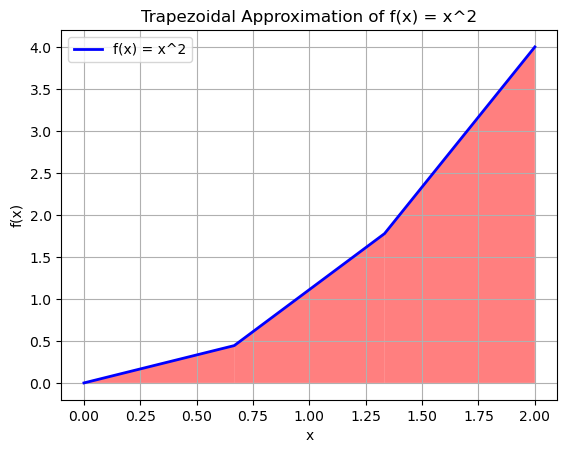

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to be approximated
def f(x):
    return x**2

# Define the interval [a, b]
a = 0
b = 2

# Number of subintervals (segments)
n = 3

# Create an array of equally spaced x values within the interval [a, b]
x = np.linspace(a, b, n+1)

# Calculate the corresponding y values for the function
y = f(x)

# Plot the function
plt.plot(x, y, 'b', label='f(x) = x^2', linewidth=2)

# Create trapezoids and plot them
for i in range(n):
    xi = [x[i], x[i], x[i+1], x[i+1]]
    yi = [0, f(x[i]), f(x[i+1]), 0]
    plt.fill(xi, yi, 'r', alpha=0.5)

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Trapezoidal Approximation of f(x) = x^2')
plt.legend(loc='best')

# Show the plot
plt.grid()
plt.show()
